# 1.PROBLEM DEFINITION
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories
  > predict the productivity performance of the working teams in their factories given paraments,  predicting the productivity range (0-1)

# 2. Data
The dataset used in this project is from kaggle ,link to the site("https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees")


# 3. Evaluation
In this model the mode of evaluation was R-squared, MAE (Mean absolute error) and RMSE (Root Mean Squared Error).

# 4. Features
This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

Attribute Information:

01. date : Date in MM-DD-YYYY
02. day : Day of the Week
03. quarter : A portion of the month. A month was divided into four quarters
04. department : Associated department with the instance
05. team_no : Associated team number with the instance
06. no_of_workers : Number of workers in each team
07. no_of_style_change : Number of changes in the style of a particular product
08. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

# Preparing the tools
* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.
* Seaborne for data visualization

# Import data analysis tools 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv("garments_worker_productivity.csv",
                parse_dates=["date"]) # importing dataset
df.shape # (rows, columns)

(1197, 15)

In [3]:
# top 10 rows of our dataframe
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,2015-01-01,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,2015-01-01,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,2015-01-01,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,2015-01-01,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,2015-01-01,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [4]:
# get information about data types of the column and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [5]:
# top 10 rows
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,sweing,finishing,sweing,sweing,sweing,sweing,finishing,sweing,sweing,sweing
day,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday
team,8,1,11,12,6,7,2,3,2,1
targeted_productivity,0.8,0.75,0.8,0.8,0.8,0.8,0.75,0.75,0.75,0.75
smv,26.16,3.94,11.41,11.41,25.9,25.9,3.94,28.08,19.87,28.08
wip,1108.0,NaN,968.0,968.0,1170.0,984.0,NaN,795.0,733.0,681.0
over_time,7080,960,3660,3660,1920,6720,960,6900,6000,6900
incentive,98,0,50,50,50,38,0,45,34,45


In [6]:
# bottom 10 rows
df.tail(10).T

,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196
date,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00,2015-03-11 00:00:00
quarter,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2,Quarter2
department,sweing,sweing,sweing,sweing,sweing,finishing,finishing,finishing,finishing,finishing
day,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
team,4,5,8,6,7,10,8,7,9,6
targeted_productivity,0.75,0.7,0.7,0.7,0.65,0.75,0.7,0.65,0.75,0.7
smv,26.82,26.82,30.48,23.41,30.48,2.9,3.9,3.9,2.9,2.9
wip,1054.0,992.0,914.0,1128.0,935.0,NaN,NaN,NaN,NaN,NaN
over_time,7080,6960,6840,4560,6840,960,960,960,1800,720
incentive,45,30,30,40,26,0,0,0,0,0


In [7]:
# Names of columns
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [8]:
#value count of quarter
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [9]:
#value count of department
df.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [10]:
#value count of targeted_productivity
df.targeted_productivity.value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

In [11]:
#value count of day
df.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [12]:
#value count of team
df.team.value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [13]:
#value count of incentive
df.incentive.value_counts()

0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: incentive, dtype: int64

<AxesSubplot: xlabel='date', ylabel='actual_productivity'>

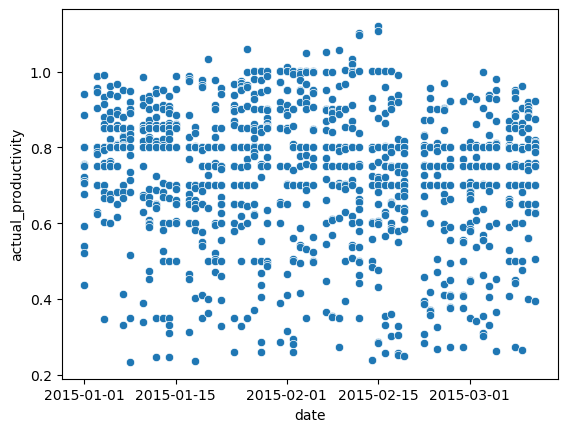

In [14]:
# relaionship of date ande actual_productivity
sns.scatterplot(data=df, x="date", y="actual_productivity")

In [15]:
# statistical summary of the dataset
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [16]:
# Check for missing values
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [54]:
# Dealing with missing data in wip column
df["wip"].fillna(0, inplace = True)

In [18]:
# checking if there is missing values in wip column
df["wip"].isna().sum()

0

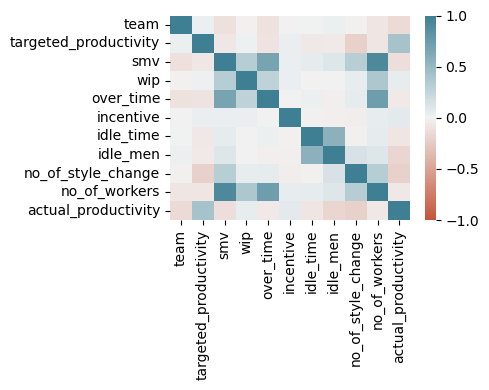

In [19]:
# Correlation heat map
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

`OBSERVATION:` targeted_productivity is highly correlated to actual_productivity

# HISTOGRAM

## targeted_productivity

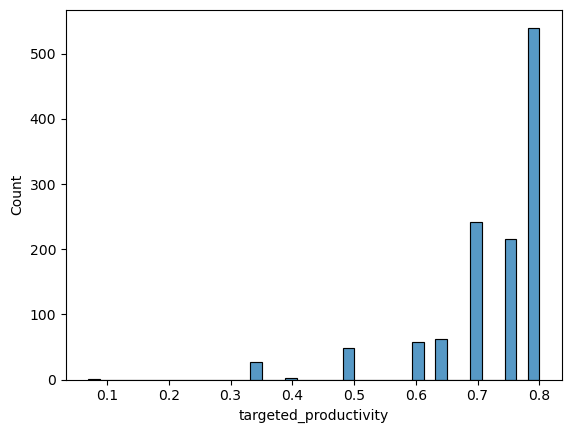

In [56]:
sns.histplot(data=df, x="targeted_productivity");

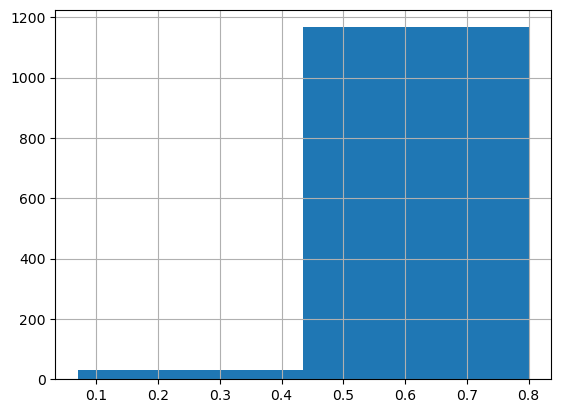

In [21]:
hist = df.targeted_productivity.hist(bins=2)

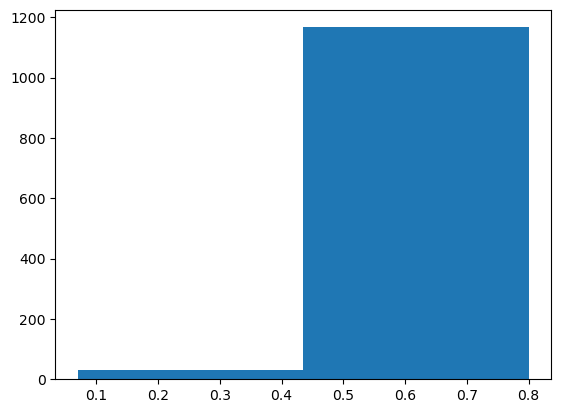

In [22]:
plt.hist( df.targeted_productivity, bins=2);

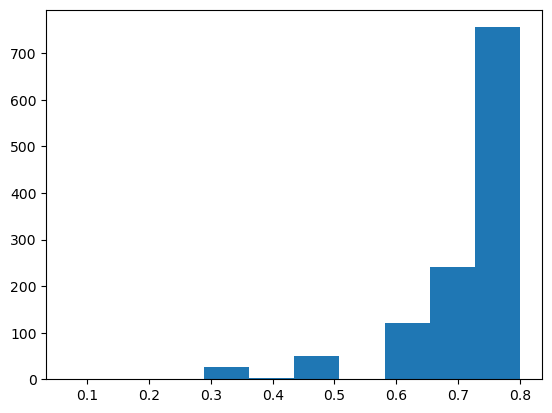

In [23]:
fig, ax = plt.subplots()
ax.hist(df.targeted_productivity);

## actual_productivity

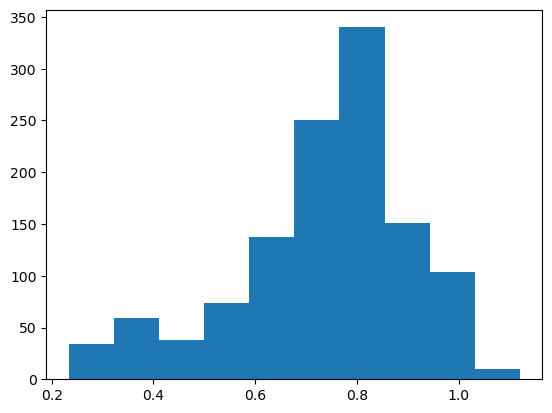

In [24]:
fig, ax = plt.subplots()
ax.hist(df.actual_productivity);

# Add datetime parameters for date column

In [25]:
# Add datetime parameters for saledate
df["Year"] = df.date.dt.year
df["Month"] = df.date.dt.month
df["Day"] = df.date.dt.day
df["Dayofweek"] = df.date.dt.dayofweek
df["Dayofyear"] = df.date.dt.dayofyear

# Drop original saledate
df.drop("date", axis=1, inplace=True)

In [26]:
df.head().T

,0,1,2,3,4
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,sweing,finishing,sweing,sweing,sweing
day,Thursday,Thursday,Thursday,Thursday,Thursday
team,8,1,11,12,6
targeted_productivity,0.8,0.75,0.8,0.8,0.8
smv,26.16,3.94,11.41,11.41,25.9
wip,1108.0,0.0,968.0,968.0,1170.0
over_time,7080,960,3660,3660,1920
incentive,98,0,50,50,50
idle_time,0.0,0.0,0.0,0.0,0.0


# Handling the objects

In [27]:
# These columns contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

quarter
department
day


In [28]:
# converting string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   category
 1   department             1197 non-null   category
 2   day                    1197 non-null   category
 3   team                   1197 non-null   int64   
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   wip                    1197 non-null   float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
 14  Year                   1197 non-null   i

In [30]:
# Check columns which *aren't* numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

quarter
department
day


In [31]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
      # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1  

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int8   
 1   department             1197 non-null   int8   
 2   day                    1197 non-null   int8   
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  Year                   1197 non-null   int64  
 15  Mont

# Modeling
## splitting data

In [33]:
# Everything except target variable
X = df.drop("actual_productivity", axis=1)

# Target variable
y = df.actual_productivity.values

## Rescaling the data

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[-1.15168784  0.78297599  0.27151595 ... -1.45397973  0.08863183
  -1.67088893]
 [-1.15168784 -0.458378    0.27151595 ... -1.45397973  0.08863183
  -1.67088893]
 [-1.15168784  0.78297599  0.27151595 ... -1.45397973  0.08863183
  -1.67088893]
 ...
 [-0.32866077 -1.69973198  1.43849833 ... -0.29393591 -0.3849945
   1.67514272]
 [-0.32866077 -1.69973198  1.43849833 ... -0.29393591 -0.3849945
   1.67514272]
 [-0.32866077 -1.69973198  1.43849833 ... -0.29393591 -0.3849945
   1.67514272]]


# train and test split

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
# Random seed for reproducibility
np.random.seed(55)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.4720617986224811
MAE: 0.08342378026645836
MSE: 0.016909751253813884


# Hyperparameter tuning with RandomizedSearchCV

In [37]:
# removing warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [600]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [600],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [38]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 600,
 'max_features': 0.5,
 'max_depth': None}

## Train a model with the best parameters

In [39]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 233 ms


RandomForestRegressor(max_features=0.5, n_estimators=40, n_jobs=-1)

In [40]:
# Evaluate the RandomizedSearch model
# Fit model
ideal_model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.4720617986224811
MAE: 0.08342378026645836
MSE: 0.016909751253813884


# Feature Importance

In [41]:
# Find feature importance of our best model
model.feature_importances_

array([0.01585431, 0.01610193, 0.0363744 , 0.07395145, 0.23374774,
       0.12687447, 0.02211528, 0.05645843, 0.125819  , 0.00709894,
       0.01609808, 0.00188208, 0.07585967, 0.        , 0.00388999,
       0.07464798, 0.02925537, 0.08397088])

In [42]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

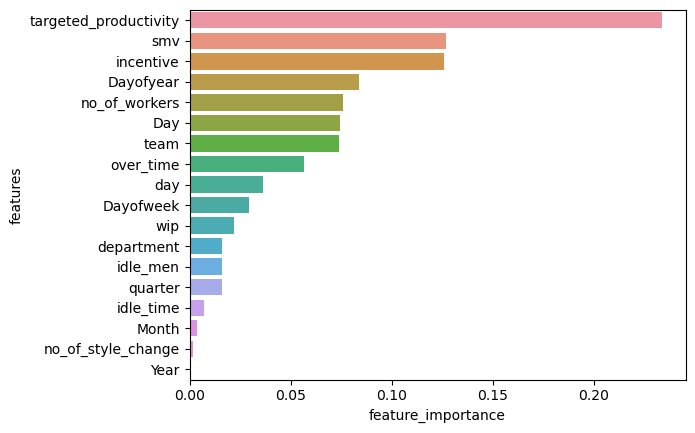

In [43]:
plot_features(X_train.columns, model.feature_importances_)

# XGBRegressor

## loading the required libraries. 

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

## Defining and fitting the model

In [45]:
xgbr = xgb.XGBRegressor(verbosity=0) 

print(xgbr)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [46]:
# fit the model with train data
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Predicting and checking the results

##  check the model training score

In [47]:
score = xgbr.score(X_train, y_train)  

print("Training score: ", score)

Training score:  0.9951835396513102


## KFlold method in cross-validation

In [48]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr,X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.38


## cross-validation method to evaluate the training score

In [49]:
scores = cross_val_score(xgbr,X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.38


# predict test data and  check the prediction accuracy

In [50]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)

In [51]:
mse

0.016142756651673012

In [52]:
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 0.13


## visualize the original and predicted test data

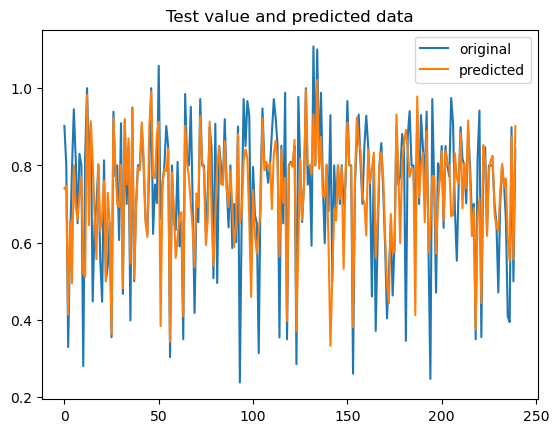

In [53]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")

plt.title("Test value and predicted data")

plt.legend()
plt.show()